In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec

## Import data

In [25]:
file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)

In [26]:
df_recovered.iloc[0,4:]

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
6/21/20     8764
6/22/20     8841
6/23/20     9260
6/24/20     9869
6/25/20    10174
Name: 0, Length: 156, dtype: object

### Data manipulation and representation (World)

In [27]:
deaths_world=df_deaths.iloc[:,-1].sum()
recovered_world=df_recovered.iloc[:,-1].sum()
total_world=df_confirmed.iloc[:,-1].sum()

max_death_rate=round(deaths_world/(deaths_world+recovered_world)*100,1)
min_death_rate=round(deaths_world/total_world*100,1)

print('Total contaminated:',total_world)
print('Total deaths:',deaths_world)
print('Total recovered:',recovered_world)

print('Based on the WHO data, the death rate is between',min_death_rate,'% and',max_death_rate,'% of the confirmed case')

Total contaminated: 9609829
Total deaths: 489312
Total recovered: 4838921
Based on the WHO data, the death rate is between 5.1 % and 9.2 % of the confirmed case


3.2756056307705776
1.9932954729186307


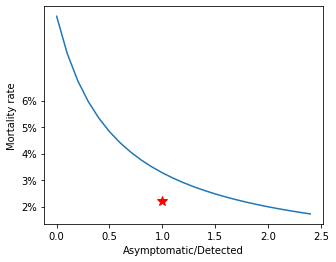

In [28]:
def mortality_rate(f_asympt):
    recovered_tot=recovered_world+f_asympt*total_world
    return deaths_world/(deaths_world+recovered_tot)

print(mortality_rate(1)*100)
print(mortality_rate(2)*100)

f_asympt_grid=np.arange(0,2.5,0.1)

plt.figure(figsize=(5,4))
plt.plot(f_asympt_grid,mortality_rate(f_asympt_grid)*100)
plt.xlabel('Asymptomatic/Detected')
plt.ylabel('Mortality rate')
plt.yticks([1,2,3,4,5,6],['1%','2%','3%','4%','5%','6%'])
plt.plot(1,2.2,marker='*',color='red',markersize=11)
plt.savefig('mortality_rate_plot.png',dpi=300)
plt.show()

In [29]:
def func_plot(df):
    y_world=[]
    n_cols=df.shape[1]
    #print(n_cols)
    for i in range(n_cols-4):
        y_world.append(df.iloc[:,i+4].sum())
    
    x_world2=df.columns[4:]
    x_world=pd.to_datetime(x_world2,infer_datetime_format=False)
    
    return (x_world,y_world)

peppe=func_plot(df_confirmed)

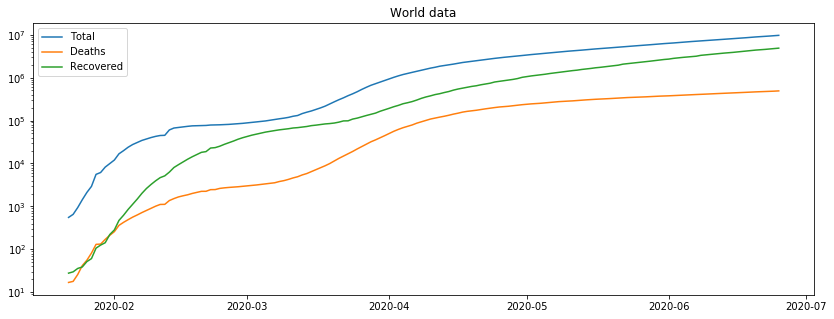

In [30]:
plt.figure(figsize=(14,5))
plt.plot(func_plot(df_confirmed)[0],func_plot(df_confirmed)[1],label='Total')
plt.plot(func_plot(df_deaths)[0],func_plot(df_deaths)[1],label='Deaths')
plt.plot(func_plot(df_recovered)[0],func_plot(df_recovered)[1],label='Recovered')
plt.legend()
plt.yscale('log')
plt.title('World data')
plt.savefig('world_plot.png',dpi=300)
plt.show()

### Data manipulation and representation (single country)

In [31]:
######## INPUT PARAMETERS ########
country='Sweden'
t0=pd.to_datetime('2020-02-21')
#################################

mask_ita=df_confirmed['Country/Region']==country   # you can change the country here
mask_ita_rec=df_recovered['Country/Region']==country

df_confirmed_ITA=df_confirmed.loc[mask_ita,:]
df_deaths_ITA=df_deaths.loc[mask_ita,:]
df_recovered_ITA=df_recovered.loc[mask_ita_rec,:]

deaths_world_ITA=df_deaths_ITA.iloc[:,-1].sum()
recovered_world_ITA=df_recovered_ITA.iloc[:,-1].sum()
total_world_ITA=df_confirmed_ITA.iloc[:,-1].sum()

max_death_rate_ITA=round(deaths_world_ITA/(deaths_world_ITA+recovered_world_ITA)*100,1)
min_death_rate_ITA=round(deaths_world_ITA/total_world_ITA*100,1)

print('Total contaminated:',country,total_world_ITA)
print('Total deaths',country,deaths_world_ITA)
print('Total recovered ',country,recovered_world_ITA)

print('Based on the WHO data, the death rate in',country,'is between',min_death_rate_ITA,'% and',max_death_rate_ITA,'% of the total confirmed case')

Total contaminated: Sweden 63890
Total deaths Sweden 5230
Total recovered  Sweden 0
Based on the WHO data, the death rate in Sweden is between 8.2 % and 100.0 % of the total confirmed case


In [32]:
df_deaths_ITA.iloc[0,[14,43,74,104,135]]

2/1/20       0
3/1/20       0
4/1/20     239
5/1/20    2653
6/1/20    4403
Name: 205, dtype: object

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


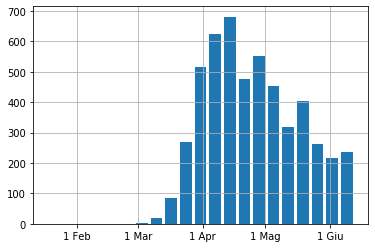

In [33]:
morti=df_deaths_ITA.iloc[0,7:]
morti_diff=[]

for i in range(int(len(morti)/7)):
    print(i)
    morti_diff.append(morti[7*(i+1)]-morti[7*i])
    
plt.bar(np.arange(0,len(morti_diff)),morti_diff)
plt.xticks((np.array([14,43,74,104,135])-3)/7,['1 Feb','1 Mar','1 Apr','1 Mag','1 Giu'])
plt.grid()
plt.show()

In [34]:
np.std(morti_diff[10:])

150.73116564772087

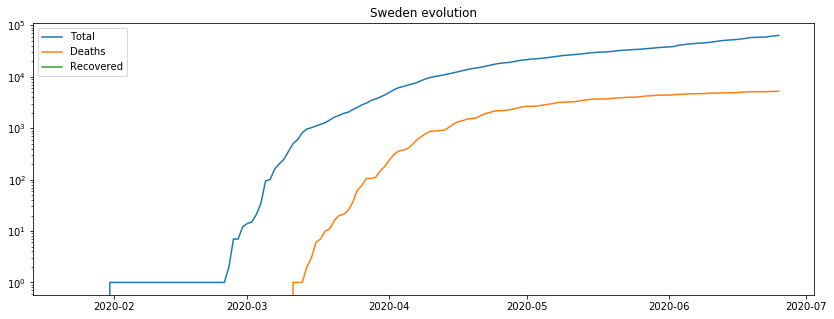

In [35]:
plt.figure(figsize=(14,5))
plt.plot(func_plot(df_confirmed_ITA)[0],func_plot(df_confirmed_ITA)[1],label='Total')
plt.plot(func_plot(df_deaths_ITA)[0],func_plot(df_deaths_ITA)[1],label='Deaths')
plt.plot(func_plot(df_recovered_ITA)[0],func_plot(df_recovered_ITA)[1],label='Recovered')
plt.legend()
plt.yscale('log')
plt.title(country+' evolution')
plt.savefig('output/country_plot.png',dpi=300)
plt.show()

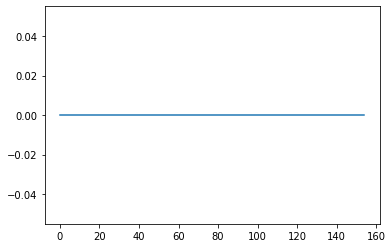

In [36]:
data_germ=np.array(func_plot(df_recovered_ITA)[1])

plt.plot(np.diff(data_germ))

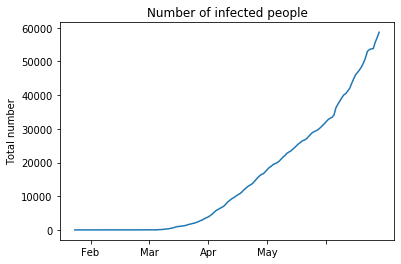

In [37]:
ytot=np.array(func_plot(df_confirmed_ITA)[1])
ydeaths=np.array(func_plot(df_deaths_ITA)[1])
yrec=np.array(func_plot(df_recovered_ITA)[1])

plt.plot(ytot-ydeaths-yrec)
#plt.yscale('log')
plt.xticks(np.arange(8,130,30),['Feb','Mar','Apr','May'])
plt.ylabel('Total number')
plt.title('Number of infected people')
plt.savefig('activegermany.png',dpi=300)
plt.show()

### Generalization to other countries

In [38]:
def whichcountry(name):
        
    ######## INPUT PARAMETERS ########
    country=name
    t0=pd.to_datetime('2020-02-21')
    #################################

    mask_ita=df_confirmed['Country/Region']==country   # you can change the country here
    mask_ita_rec=df_recovered['Country/Region']==country

    df_confirmed_ITA=df_confirmed.loc[mask_ita,:]
    df_deaths_ITA=df_deaths.loc[mask_ita,:]
    df_recovered_ITA=df_recovered.loc[mask_ita_rec,:]

    ytot=np.array(func_plot(df_confirmed_ITA)[1])
    ydeaths=np.array(func_plot(df_deaths_ITA)[1])
    yrec=np.array(func_plot(df_recovered_ITA)[1])

    return ytot-ydeaths-yrec, ytot[-1], yrec[-1],ydeaths[-1]


#definition of time
df_time=pd.to_datetime(np.arange(len(ytot)),unit='D',origin=pd.Timestamp('2020-01-22'))

In [39]:
# list of top countries , with the higher number of cases

df_nofcases=pd.DataFrame(np.array(df_confirmed.iloc[:,1]))
df_nofcases.columns=['Country']
df_nofcases['Confirmed']=df_confirmed.iloc[:,-1]

df_nofcases
np.array(df_nofcases.sort_values(by='Confirmed',ascending=False).head(6)['Country'])

array(['US', 'Brazil', 'Russia', 'India', 'United Kingdom', 'Peru'],
      dtype=object)

In [40]:
# choose the country here
countries_list=['US', 'Spain', 'Italy', 'Germany', 'France', 'United Kingdom']

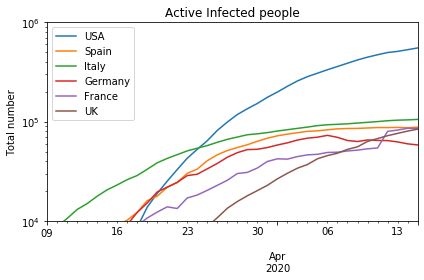

In [41]:
df_active=pd.DataFrame(whichcountry('US')[0])
df_active.columns=['US']
df_active.index=df_time

for i in range(1,len(countries_list)):
    df_active[countries_list[i]]=whichcountry(countries_list[i])[0]

df_active.columns=['USA','Spain','Italy','Germany','France','UK']
    
df_active.plot()
plt.xlim('2020-03-09','2020-04-15')
plt.title('Active Infected people')
plt.ylabel('Total number')
plt.yscale('log')
plt.ylim(10**4,10**6)
plt.tight_layout()
plt.savefig('output/world_active_infected.png',dpi=300)
plt.show()

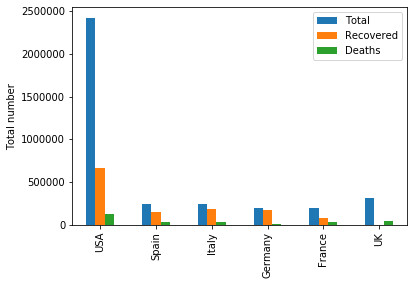

In [42]:
trd=[]

for cname in countries_list:
    trd.append(whichcountry(cname)[1:])
    
trd_df=pd.DataFrame(trd)
trd_df.columns=['Total','Recovered','Deaths']
trd_df.index=df_active.columns

trd_df.plot(kind='bar')
plt.ylabel('Total number')
plt.show()

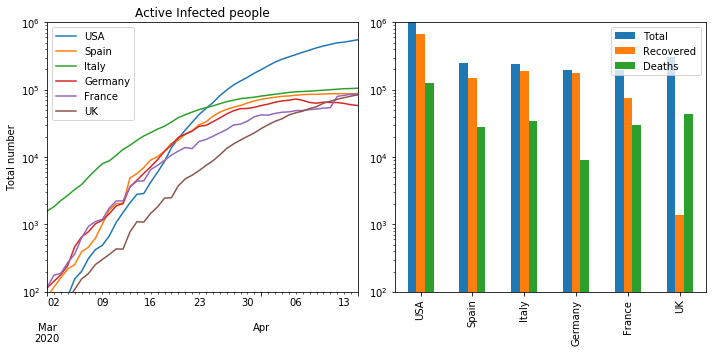

In [43]:
fig, axes = plt.subplots(figsize=(10,5),nrows=1, ncols=2)
ax1=plt.subplot(1,2,1)
df_active.plot(ax=ax1)
plt.xlim('2020-03-01','2020-04-15')
plt.title('Active Infected people')
plt.ylabel('Total number')
plt.yscale('log')
plt.ylim(10**2,10**6)
ax2=plt.subplot(1,2,2)
trd_df.plot(kind='bar',ax=ax2)
plt.yscale('log')
plt.ylim(10**2,10**6)
plt.tight_layout()
plt.savefig('output/world_comparison.png',dpi=300)

In [44]:
df_confirmed['Country/Region'].iloc[150:180]

150           Lithuania
151          Luxembourg
152          Madagascar
153            Malaysia
154            Maldives
155               Malta
156          Mauritania
157           Mauritius
158              Mexico
159             Moldova
160              Monaco
161            Mongolia
162          Montenegro
163             Morocco
164             Namibia
165               Nepal
166         Netherlands
167         Netherlands
168         Netherlands
169         Netherlands
170         New Zealand
171           Nicaragua
172               Niger
173             Nigeria
174     North Macedonia
175              Norway
176                Oman
177            Pakistan
178              Panama
179    Papua New Guinea
Name: Country/Region, dtype: object

In [45]:
datatot_reg = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

def dataregion(name):

    mask = datatot_reg['denominazione_regione']==name
    data =datatot_reg.loc[mask,:]
    xdata=pd.to_numeric(range(data.shape[0]))
    ydata=data['totale_casi']
    ydata_death=data['deceduti']
    ydata_rec=data['dimessi_guariti']

    #print(data.iloc[-1,:])

    yinfected=np.array(ydata-ydata_death-ydata_rec)
    
    return yinfected

ydata_inf_lomb=np.random.rand(len(df_time))
ydata_inf_lomb[33:]=dataregion('Lombardia')

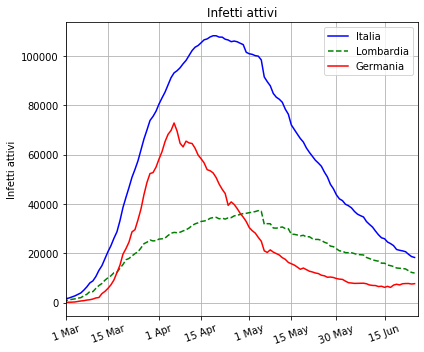

In [72]:
plt.figure(figsize=(6,5))
#plt.plot(df_time,whichcountry('France')[0],label='Francia')
#plt.plot(df_time,whichcountry('Spain')[0],label='Spagna')
#plt.plot(df_time,whichcountry('Italy')[0],label='Italia')
#plt.plot(df_time,whichcountry('Germany')[0],label='Germania')
#plt.plot(df_time,whichcountry('Switzerland')[0],label='Svizzera')
#plt.plot(df_time,whichcountry('Austria')[0],label='Austria')
#plt.plot(df_time,whichcountry('Greece')[0],label='Grecia')
#plt.plot(df_time,whichcountry('Sweden')[0]/10**7*10000,label='Svezia',color='orange')
plt.plot(df_time,whichcountry('Italy')[0],label='Italia',color='blue')
plt.plot(df_time,ydata_inf_lomb,label='Lombardia',color='green',linestyle='--')
plt.plot(df_time,whichcountry('Germany')[0],label='Germania',color='red')
#plt.plot(df_time,whichcountry('Netherlands')[0],label='Olanda')
plt.xticks(rotation=30)
plt.title('Infetti attivi')
plt.ylabel('Infetti attivi')
plt.xticks(['2020-03-01','2020-03-15','2020-04-01','2020-04-15','2020-05-01','2020-05-15','2020-05-30','2020-06-15','2020-06-30'],['1 Mar','15 Mar','1 Apr','15 Apr','1 May','15 May','30 May','15 Jun','30 Jun'],rotation=20)
plt.xlim('2020-03-01','2020-06-26')
#plt.ylabel('Totale')
plt.grid()
#plt.annotate("Phase 2", xy=('2020-04-20',50000), xytext=('2020-04-10',20000), arrowprops=dict(arrowstyle="->"),fontsize=13)
plt.legend()
plt.tight_layout()
plt.savefig('output/germany_active_infected.png',dpi=300)
plt.show()

In [47]:
whichcountry('Italy')[0]

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      2,      2,      2,      2,      2,      2,      2,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,     19,     59,
          150,    221,    311,    438,    593,    821,   1053,   1577,
         1835,   2263,   2706,   3296,   3916,   5061,   6387,   7985,
         8794,  10590,  13052,  14955,  17750,  20603,  23073,  26062,
        28710,  33190,  38549,  42681,  46638,  50826,  54030,  57521,
        62013,  66414,  70065,  73880,  75528,  77635,  80572,  83049,
        85388,  88274,  91246,  93187,  94067,  95262,  96877,  98273,
       100269, 102253, 103616, 104291, 105418, 106607, 106962, 107771,
       108257, 108237, 107709, 107699, 106848, 106527, 105847, 106103,
       105813, 105205, 104657, 101551, 100943, 100704, 100179,  99980,
        98467,  91528,  89624,  87961,  84842,  83324,  82488,  81266,
      

In [48]:
df_DEU=pd.DataFrame(df_time) 
df_DEU['y_inf']=whichcountry('Germany')[0]
df_DEU.columns=['time','y_inf']

df_DEU.to_csv('y_inf_DEU.txt',index=False)

# r0 estimation

In [49]:
from scipy.integrate import odeint

# The SIR model differential equations.
def deriv(y, t, N, beta,gamma):
    S,I,R = y

    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

def SIR(N,beta,gamma,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,beta,gamma))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

1.12


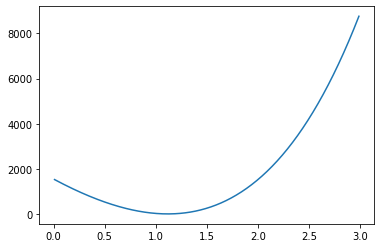

In [73]:
ydata_inf=whichcountry('Germany')[0]
xdata=np.arange(0,len(ydata_inf))

today=len(xdata)

def minimizer(R0,t1=today-7,t2=today,gamma=1/14):
    
    #true data
    ydata_inf_2=np.array(ydata_inf[t1:t2])
    xdata_2=np.arange(0,len(ydata_inf_2))
    
    #model
    fin_result=SIR(80*10**6,gamma*R0,gamma,I0=ydata_inf_2[0])
    i_vec=fin_result[2]
    i_vec_2=i_vec[0:len(xdata_2)]
    
    #average error
    #error=np.sum(np.abs(ydata_inf_2-i_vec_2)/ydata_inf_2)*100
    error=np.sum((ydata_inf_2-i_vec_2)**2/ydata_inf_2)
    
    return error

minimizer_vec=np.vectorize(minimizer)


#definition of the ideal r0

xgrid=np.arange(0.01,3,0.01)
ygrid=minimizer_vec(xgrid,gamma=1/21)
r0_ideal=round(xgrid[np.argmin(ygrid)],3)
r0_ideal

print(r0_ideal)

plt.plot(xgrid,ygrid)
plt.show()

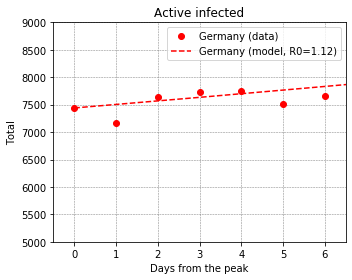

In [81]:
ydata_inf_2=np.array(ydata_inf[today-7:today])
xdata_2=np.arange(0,len(ydata_inf_2))

fin_result=SIR(80*10**6,1/14*r0_ideal,1/14,I0=ydata_inf_2[0])

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]


#italian data
ydata_inf_ITA=whichcountry('Germany')[0]
ydata_inf_ITA=np.array(ydata_inf_ITA[today-7:today])
xdata_ITA=np.arange(0,len(ydata_inf_ITA))
i_vec_ITA=SIR(60*10**6,0.92/14,1/14,I0=ydata_inf_ITA[0])[2]

plt.figure(figsize=(5,4))
#plt.plot(xdata_ITA,ydata_inf_ITA,color='blue',linestyle='None',marker='o',label='Italia (dati)')
plt.plot(xdata_2,ydata_inf_2,color='red',linestyle='None',marker='o',label='Germany (data)')
#plt.plot(t, i_vec_ITA, 'r--', label='Italia (modello, R0=0.92)',color='blue')
plt.plot(t, i_vec, 'r--', label='Germany (model, R0='+str(r0_ideal)+')')
#plt.yscale('log')
#plt.xticks(np.arange(14,70,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr'],rotation=30)
plt.xlim(-0.5,6.5)
#plt.ylim(ydata_inf_2[-1]*0.7,ydata_inf_2[-1]*1.3)
#plt.ylim(0,300)
plt.xlabel('Days from the peak')
plt.ylabel('Total')
plt.ylim(5000,9000)
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Active infected')
plt.tight_layout()
plt.savefig('output/r0-comparison.png',dpi=300)
plt.show()

In [52]:
def minimizer_gamma(gamma,t1=today-25,t2=today):
    
    xgrid=np.arange(0.01,1.3,0.01)
    ygrid=minimizer_vec(xgrid,t1,t2,gamma=gamma)
    r0_ideal=round(xgrid[np.argmin(ygrid)],2)
    r0_ideal
    return r0_ideal

minimizer_gamma_vec=np.vectorize(minimizer_gamma)

gamma_grid=1/np.arange(1,16,1)
r0gamma_res=minimizer_gamma_vec(gamma_grid)

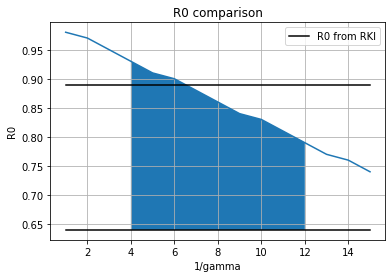

In [53]:
plt.plot(1/gamma_grid,r0gamma_res)
plt.plot(1/gamma_grid,r0gamma_res*0+0.64,color='black',label='R0 from RKI')
plt.plot(1/gamma_grid,r0gamma_res*0+0.89,color='black')
plt.fill_between(np.arange(4,13,1),minimizer_gamma_vec(1/np.arange(4,13,1)),np.arange(4,13,1)*0+0.64)
plt.grid()
plt.xlabel('1/gamma')
plt.ylabel('R0')
plt.legend()
plt.title('R0 comparison')
plt.savefig('output/r0-germany-comparison.png',dpi=300)
plt.show()

### Old code

In [54]:
'''
from scipy.optimize import curve_fit

def func(t,t0,a):
    #return (a-b*t)**(t-t0)
    return a**(t-t0)

x_ITA=pd.to_datetime(df_confirmed.columns[4:],format='%m/%d/%y')

tdelta=x_ITA-t0  #this should be adapted to the country

xdata2=tdelta.days
xdata=xdata2[xdata2>=0]

ydata=np.array(func_plot(df_confirmed_ITA)[1])
ydata=ydata[xdata2>=0]

ydata_death=np.array(func_plot(df_deaths_ITA)[1])
ydata_death=ydata_death[xdata2>=0]

mask=xdata2>=0

ydata_rec=np.array(func_plot(df_recovered_ITA)[1])
ydata_rec=ydata_rec[mask[0:len(mask)-1]]

popt, pcov = curve_fit(func, xdata, ydata,p0=[0,2])

def func_death(t,mort_rate):
    return mort_rate*popt[1]**(t-popt[0])

popt_death, pcov_death = curve_fit(func_death, xdata, ydata_death)

plt.figure(figsize=(5,5))
plt.plot(xdata, func(xdata, *popt), 'b--')
plt.plot(xdata, func_death(xdata, *popt_death), color='orange',linestyle='--')
plt.errorbar(xdata,ydata,np.sqrt(ydata),linestyle='None',label='Contaminated',marker='s')
plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='None',label='Deaths',marker='s')
plt.errorbar(xdata[0:len(xdata)-1],ydata_rec,np.sqrt(ydata_rec),linestyle='None',label='Recovered',marker='s')
plt.yscale('log')
plt.legend()
plt.xlabel('Days from the beginning')
plt.ylabel('Number')
plt.savefig('evoita.png',dpi=300)
plt.show()
'''

"\nfrom scipy.optimize import curve_fit\n\ndef func(t,t0,a):\n    #return (a-b*t)**(t-t0)\n    return a**(t-t0)\n\nx_ITA=pd.to_datetime(df_confirmed.columns[4:],format='%m/%d/%y')\n\ntdelta=x_ITA-t0  #this should be adapted to the country\n\nxdata2=tdelta.days\nxdata=xdata2[xdata2>=0]\n\nydata=np.array(func_plot(df_confirmed_ITA)[1])\nydata=ydata[xdata2>=0]\n\nydata_death=np.array(func_plot(df_deaths_ITA)[1])\nydata_death=ydata_death[xdata2>=0]\n\nmask=xdata2>=0\n\nydata_rec=np.array(func_plot(df_recovered_ITA)[1])\nydata_rec=ydata_rec[mask[0:len(mask)-1]]\n\npopt, pcov = curve_fit(func, xdata, ydata,p0=[0,2])\n\ndef func_death(t,mort_rate):\n    return mort_rate*popt[1]**(t-popt[0])\n\npopt_death, pcov_death = curve_fit(func_death, xdata, ydata_death)\n\nplt.figure(figsize=(5,5))\nplt.plot(xdata, func(xdata, *popt), 'b--')\nplt.plot(xdata, func_death(xdata, *popt_death), color='orange',linestyle='--')\nplt.errorbar(xdata,ydata,np.sqrt(ydata),linestyle='None',label='Contaminated',marke

In [55]:
'''

print('The number of contaminated people increases everyday of a factor',round(popt[1],2))

print('Prediction for the number of contaminated people in 1 week',int(func(xdata[-1]+7, *popt)))

print('Prediction for the number of func_deaths in 1 week',int(func_death(xdata[-1]+7, *popt_death)))

# percentage variation of the contaminted people, compared to the previous day

incremento=[]

for i in range(3,len(ydata)):
    incremento.append((ydata[i]/ydata[i-1]-1)*100)
    
plt.bar(xdata[xdata>=3],incremento)
plt.xlabel('Days from the beginning')
plt.ylabel('% variation from the previous day')
plt.savefig('incr_perc.png',dpi=300)
plt.show()

### combined plot

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(xdata, func(xdata, *popt), 'b--')
plt.plot(xdata, func_death(xdata, *popt_death), color='orange',linestyle='--')
plt.errorbar(xdata,ydata,np.sqrt(ydata),linestyle='None',label='Contaminated',marker='s')
plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='None',label='Deaths',marker='s')
#plt.errorbar(xdata,ydata_rec,np.sqrt(ydata_rec),linestyle='None',label='Recovered',marker='s')
plt.yscale('log')
plt.legend()
plt.xlabel('Days from the beginning')
plt.ylabel('Number')
plt.subplot(1,2,2)
plt.bar(xdata[xdata>=3],incremento)
plt.xlabel('Days from the beginning')
plt.ylabel('% variation compared to the previous day')
plt.tight_layout()
plt.savefig('combined.png',dpi=300)
plt.show()

# save data from Italy on an external file

vec_ITA=xdata,ydata,ydata_death,np.concatenate([[0],ydata_rec])
vec_ITA=np.transpose(vec_ITA)

df_ITA=pd.DataFrame(vec_ITA)
df_ITA.columns=(['Time','Infected','Deaths','Recovered'])

if country=='Italy':
    df_ITA.to_csv('dataITA.txt',index=None)
elif country=='Germany':
    df_ITA.to_csv('dataDEU.txt',index=None)
    
'''

"\n\nprint('The number of contaminated people increases everyday of a factor',round(popt[1],2))\n\nprint('Prediction for the number of contaminated people in 1 week',int(func(xdata[-1]+7, *popt)))\n\nprint('Prediction for the number of func_deaths in 1 week',int(func_death(xdata[-1]+7, *popt_death)))\n\n# percentage variation of the contaminted people, compared to the previous day\n\nincremento=[]\n\nfor i in range(3,len(ydata)):\n    incremento.append((ydata[i]/ydata[i-1]-1)*100)\n    \nplt.bar(xdata[xdata>=3],incremento)\nplt.xlabel('Days from the beginning')\nplt.ylabel('% variation from the previous day')\nplt.savefig('incr_perc.png',dpi=300)\nplt.show()\n\n### combined plot\n\nplt.figure(figsize=(10,5))\nplt.subplot(1,2,1)\nplt.plot(xdata, func(xdata, *popt), 'b--')\nplt.plot(xdata, func_death(xdata, *popt_death), color='orange',linestyle='--')\nplt.errorbar(xdata,ydata,np.sqrt(ydata),linestyle='None',label='Contaminated',marker='s')\nplt.errorbar(xdata,ydata_death,np.sqrt(ydata_d

# Deceduti vs PIL

### deceduti pro capita

In [56]:
# deceduti

df_deceduti=df_deaths.iloc[:,[1,-1]]
df_deceduti.columns=['Nome','Totale_morti']
df_deceduti=df_deceduti.groupby('Nome').sum()

df_deceduti.index[60:100]

Index(['Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, South',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia'],
      dtype='object', name='Nome')

In [57]:
# popolazione

dict_pop={'US':382*10**6,'United Kingdom':66.65*10**6,'Brazil':209.5*10**6,'Italy':60.36*10**6,'France':66.99*10**6,
               'Spain':46.94*10**6,'Mexico':126.2*10**6,'Belgium':11.46*10**6,'Germany':83.02*10**6,'Iran':81.8*10**6,'India':1353*10**6,
         'Russia':144.5*10**6,'Netherlands':17.28*10**6,'Peru':31.99*10**6,'Canada':37.59*10**6,'Turkey':82*10**6,'Sweden':10.23*10**6,'China':1393*10**6,'Ecuador':17.08*10**6,
         'Chile':18.73*10**6,'Pakistan':212.2*10**6,'Switzerland':8.57*10**6,'Indonesia':267.7*10**6,'Ireland':4.9*10**6,'Portugal':10.28*10**6,'Colombia':49.65*10**6,
         'Romania':19.41*10**6,'Egypt':98.42*10**6,'Poland':37.97*10**6,'South Africa':57.78*10**6,'Philippines':106.7*10**6,'Bangladesh':161.4*10**6,'Japan':126.5*10**6,
         'Ukraine':41.98*10**6,'Saudi Arabia':33.7*10**6,'Algeria':42.23*10**6,'Argentina':44.49*10**6,'Austria':8.859*10**6,'Denmark':5.806*10**6,
         'Hungary':9.773*10**6,'Dominican Republic':10.63*10**6,'Bolivia':11.35*10**6,'Panama':4.177*10**6,'Iraq':38.43*10**6,'Sudan':41.8*10**6,'Afghanistan':37.17*10**6,'Moldova':3.546*10**6,'Nigeria':195.9*10**6,'Czechia':10.69*10**6,
         'Australia':24.99*10**6,'Finland':5.518*10**6,'Greece':10.72*10**6,'Iceland':364134,'Korea, South':51.64*10**6,
         'Luxembourg':613894,'New Zealand':4.886*10**6,'Norway':5.368*10**6,'Slovakia':5.458*10**6,'Estonia':1.329*10**6,
         'Israel':8.884*10**6,'Lithuania':2.794*10**6,'Slovenia':2.081*10**6,'Latvia':1.92*10**6,'Costa Rica':5*10**6}

df_population=pd.Series(dict_pop).to_frame()

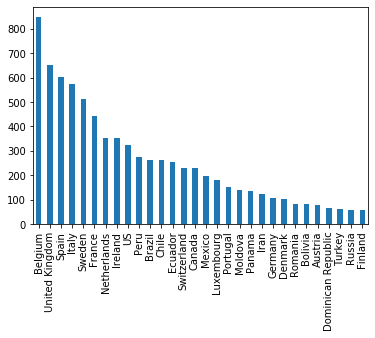

In [58]:
# deceduti in rapporto alla popolazione

df_complete=df_deceduti.join(df_population,on=df_deceduti.index)
df_complete.columns=['Totale_morti','Totale_popolazione']
df_complete['Deaths_per_million']=df_complete['Totale_morti']/df_complete['Totale_popolazione']*10**6
df_complete=df_complete.sort_values(by='Deaths_per_million',ascending=False)

df_complete['Deaths_per_million'].head(30).plot(kind='bar')
plt.xlabel('')
plt.show()

### previsioni sul PIL

In [59]:
dict_gdp={'Spain':-11.1,'France':-11.4,'Italy':-11.3,'United Kingdom':-11.5,'Czechia':-9.6,
         'Portugal':-9.4,'Belgium':-8.9,'Iceland':-9.9,'Slovakia':-9.3,
         'Lithuania':-8.1,'Latvia':-8.1,'Argentina':-8.3,'New Zealand':-8.9,'Estonia':-8.4,'Russia':-8,'Estonia':-8.4,'Switzerland':-7.7,'Netherlands':-8,'Hungary':-8,'Greece':-8,'Poland':-7.4,'Canada':-8,'Finland':-7.9,
          'Brazil':-7.4,'Slovenia':-7.8,'Germany':-6.6,'Ireland':-6.8,'Mexico':-7.5,'US':-7.3,'Israel':-6.2,'South Africa':-7.5,'Turkey':-4.8,'Colombia':-6.1,
          'Sweden':-6.7,'Luxembourg':-6.5,'Austria':-6.2,'Norway':-6,'Japan':-6,'India':-3.7,'Chile':-5.6,'Denmark':-5.8,'Australia':-5,'Costa Rica':-4.1,
         'Indonesia':-2.8,'China':-2.6,'Korea, South':-1.6}


#dict_gdp={'Spain':-11.1,'France':-11.4,'Italy':-11.3,'United Kingdom':-11.5,'Czechia':-9.6,
#         'Portugal':-9.4,'Belgium':-8.9,'Iceland':-9.9,'Slovakia':-9.3,
#         'Lithuania':-8.1,'Latvia':-8.1,'Estonia':-8.4,
#          'Switzerland':-7.7,'Netherlands':-8,'Hungary':-8,'Greece':-8,'Poland':-7.4,'Finland':-7.9,
#          'Slovenia':-7.8,'Germany':-6.6,'Ireland':-6.8,
#          'Sweden':-6.7,'Luxembourg':-6.5,'Austria':-6.2,'Norway':-6,'Denmark':-5.8}

df_gdp=pd.Series(dict_gdp).to_frame()
df_gdp.columns=['Value']

df_gdp=df_gdp.sort_values(by='Value')

df_gdp

,Value
United Kingdom,-11.5
France,-11.4
Italy,-11.3
Spain,-11.1
Iceland,-9.9
Czechia,-9.6
Portugal,-9.4
Slovakia,-9.3
Belgium,-8.9
New Zealand,-8.9


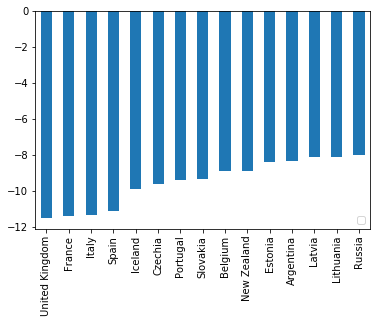

In [60]:
df_gdp.head(15)['Value'].plot(kind='bar')
plt.legend([])
plt.show()

df_finale=df_gdp.join(df_complete,on=df_gdp.index)

#df_finale

In [61]:
# analisi gdp

#df_gdp=pd.read_csv('gdp-forecast.csv')
#df_gdp=df_gdp.loc[:,['LOCATION','SUBJECT','Value']]

#dict_sigla={'AUS':'Australia','AUT':'Austria','BEL':'Belgium','CAN':'Canada','CZE':'Czechia','DNK':'Denmark','FIN':'Finland',
           #'FRA':'France','DEU':'Germany','GRC':'Greece','HUN':'Hungary','ISL':'Iceland','IRL':'Ireland','ITA':'Italy','JPN':'Japan',
           #'KOR':'Korea, South','LUX':'Luxembourg','NLD':'Netherlands','NZL':'New Zealand','NOR':'Norway','PRT':'Portugal','SVK':'Slovakia',
           #'ESP':'Spain','SWE':'Sweden','CHE':'Switzerland','GBR':'United Kingdom','USA':'US','CHL':'Chile','COL':'Colombia','EST':'Estonia',
           #'ISR':'Israel','LTU':'Lithuania','SVN':'Slovenia'}

#df_gdp.index=df_gdp['LOCATION'].map(dict_sigla)



### informazioni combinate

In [62]:
df_fin2=df_finale[['Value','Deaths_per_million']]
#df_fin2.dropna(inplace=True)

var1_gdp=(df_fin2['Value']-df_fin2['Value'].mean())/df_fin2['Value'].std()
var2_deaths=(df_fin2['Deaths_per_million']-df_fin2['Deaths_per_million'].mean())/df_fin2['Deaths_per_million'].std()

df_fin2['Punteggio']=(var2_deaths-var1_gdp)
df_fin2.columns=['Value_GDP','Deaths_per_million','Score']

df_fin2.sort_values(by='Score',ascending=False)

/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Value_GDP,Deaths_per_million,Score
United Kingdom,-11.5,649.872468,4.242337
Belgium,-8.9,848.691099,4.041217
Spain,-11.1,603.536429,3.840314
Italy,-11.3,574.519549,3.789584
France,-11.4,444.170772,3.205400
Sweden,-6.7,511.241447,1.431615
Netherlands,-8.0,354.108796,1.253715
Portugal,-9.4,150.680934,0.897110
US,-7.3,325.680628,0.804207
Ireland,-6.8,352.448980,0.710218


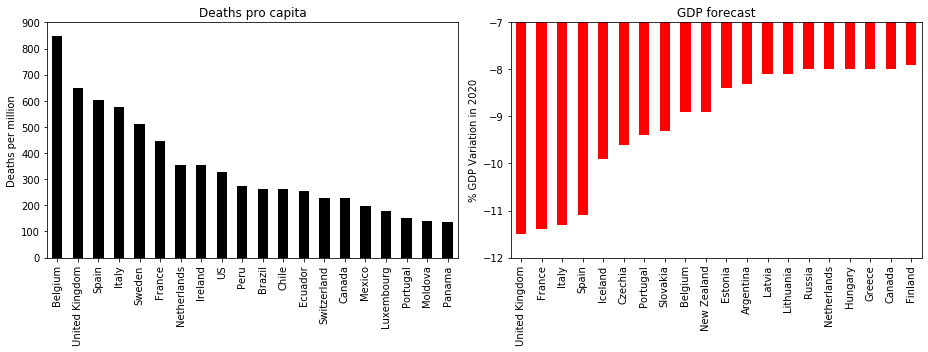

In [63]:
### final plot

fig, axes = plt.subplots(figsize=(13,5),nrows=1, ncols=2)
ax1=plt.subplot(1,2,1)
df_complete['Deaths_per_million'].head(20).plot(ax=ax1,kind='bar',color='black')
plt.xlabel('')
plt.ylim(0,900)
plt.ylabel('Deaths per million')
plt.title('Deaths pro capita')
ax2=plt.subplot(1,2,2)
df_gdp.head(20)['Value'].plot(kind='bar',ax=ax2,color='red')
plt.title('GDP forecast')
plt.ylabel('% GDP Variation in 2020')
plt.ylim(-12,-7)
plt.tight_layout()
plt.savefig('output/deaths_gdp.png',dpi=300)

### scatter plot

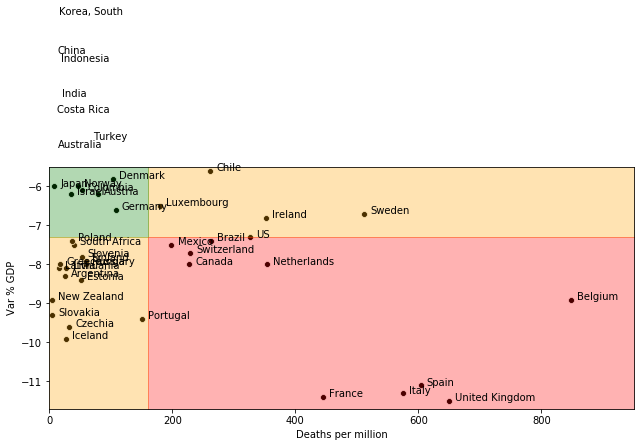

In [64]:
import seaborn as sns

x1=np.array(df_fin2['Deaths_per_million'])
x2=np.array(df_fin2['Value_GDP'])

plt.figure(figsize=(9,8))
sns.scatterplot(x='Deaths_per_million',y='Value_GDP',data=df_fin2,color='black')
plt.ylabel('Var % GDP')
plt.xlabel('Deaths per million')
plt.fill_between(np.linspace(np.mean(x1),1000,len(x2)),0,np.mean(x2),color='orange',alpha=0.3)
plt.fill_between(np.linspace(0,np.mean(x1),len(x2)),0,np.mean(x2),color='green',alpha=0.3)
plt.fill_between(np.linspace(0,np.mean(x1),len(x2)),np.mean(x2),-13,color='orange',alpha=0.3)
plt.fill_between(np.linspace(np.mean(x1),1000,len(x2)),np.mean(x2),-13,color='red',alpha=0.3)
plt.xlim(0,950)
plt.ylim(-11.7,-5.5)
for i in range(len(x1)):
    plt.text(x1[i]+10,x2[i],df_fin2.index[i],fontsize=10)
    #plt.annotate(s=df_fin2.index[i],xy=(x1[i],x2[i]),xytext=(x1[i]+20,x2[i]),fontsize=10,arrowprops={'arrowstyle':'->'})
plt.tight_layout()
plt.savefig('output/scatter_GDP_deaths.png',dpi=300)
plt.show()

### machine learning

In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [66]:
X=np.array(df_fin2.iloc[:,[1,0]])

scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [67]:
kmeans=KMeans(n_clusters=3,random_state=32)

kmeans.fit(X_std)
kmeans.predict(X_std)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [68]:
def kmeans_pred(XX,YY):
    
    newvec=np.empty([XX.shape[0],XX.shape[1]])
    print(newvec.shape)
    
    for i in range(XX.shape[0]):
        for j in range(XX.shape[1]):
            elemento=np.array([XX[i,j],YY[i,j]]).reshape(1,-1)
            elemento_std=scaler.transform(elemento)
            newvec[i,j]=kmeans.predict(elemento_std)
        
    return newvec

In [69]:
u=np.arange(0,1000,10)
v=np.arange(-15,0,0.1)

XX,YY=np.meshgrid(u,v)

ZZ=kmeans_pred(XX,YY)

(150, 100)


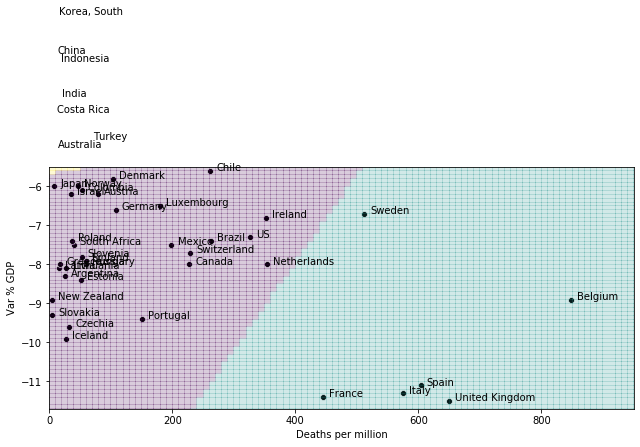

In [70]:
plt.figure(figsize=(9,8))
sns.scatterplot(x='Deaths_per_million',y='Value_GDP',data=df_fin2,color='black')
plt.ylabel('Var % GDP')
plt.xlabel('Deaths per million')
#plt.fill_between(np.linspace(np.mean(x1),1000,len(x2)),0,np.mean(x2),color='orange',alpha=0.3)
#plt.fill_between(np.linspace(0,np.mean(x1),len(x2)),0,np.mean(x2),color='green',alpha=0.3)
#plt.fill_between(np.linspace(0,np.mean(x1),len(x2)),np.mean(x2),-13,color='orange',alpha=0.3)
#plt.fill_between(np.linspace(np.mean(x1),1000,len(x2)),np.mean(x2),-13,color='red',alpha=0.3)
plt.xlim(0,950)
plt.ylim(-11.7,-5.5)
for i in range(len(x1)):
    plt.text(x1[i]+10,x2[i],df_fin2.index[i],fontsize=10)
    #plt.annotate(s=df_fin2.index[i],xy=(x1[i],x2[i]),xytext=(x1[i]+20,x2[i]),fontsize=10,arrowprops={'arrowstyle':'->'})
plt.pcolor(XX,YY,ZZ,alpha=0.2)
#plt.colorbar()
plt.tight_layout()
plt.savefig('output/kmeans_3cluster.png',dpi=300)
plt.show()